In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from scipy.optimize import curve_fit
import os
os.chdir('/Users/Lenovo/Desktop')

In [111]:
# Carga de Datos
df = pd.read_excel('Mexico_GDP.xlsx')

In [5]:
# Normalizacion de los datos
df['Norm GDP'] = df['GDP'] / df['GDP'].max()
df['Norm Periodo'] = df['Periodo'] / df['Periodo'].max() 

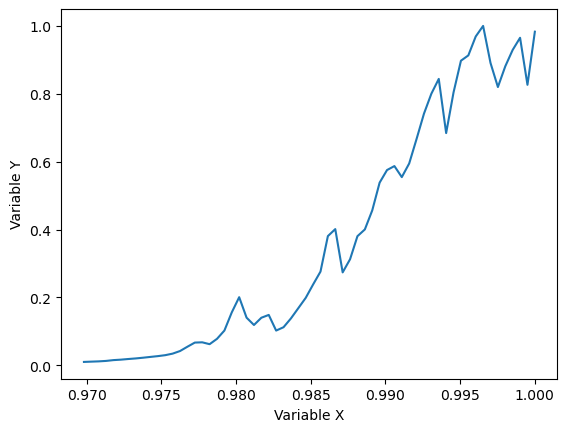

In [74]:
# Y = a + (b / (1 + c ** (X - d)))
# Visualizacion de distribucion de los datos
X = np.asanyarray(df['Norm Periodo'])
Y = np.asanyarray(df['Norm GDP'])
plt.plot(X,Y)
plt.ylabel('Variable Y')
plt.xlabel('Variable X')
plt.show()

In [99]:
# Modelo Logistico
def modelo_logistico(x, B1, B2):

  return 1 / (1 + np.float_power(B1, x - B2))

In [105]:
# Ajuste de Variables
df.astype(float)
res, cov = curve_fit(modelo_logistico, df['Periodo'], df['Norm GDP'], p0=[2, 2000])

B1, B2 = res

C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in float_power
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [107]:
# Pronostico del PIB para el 2022
ano_prev = 2022

pib_normalizado_2022 = modelo_logistico(ano_prev, B1, B2)
pib_2022 = pib_normalizado_2022 * df['GDP'].max()

print("Predicción del PIB para 2022:", pib_2022)

Predicción del PIB para 2022: 1255426580989.5503


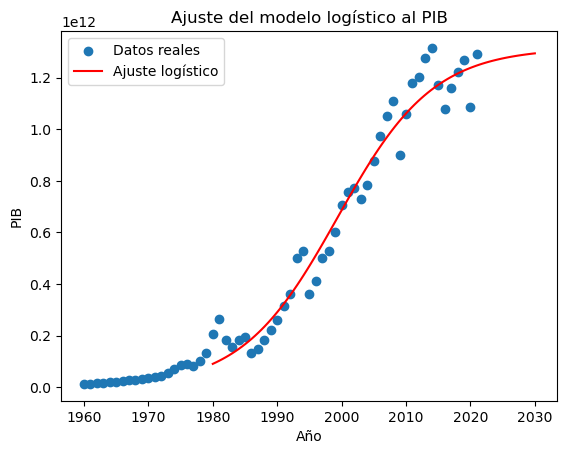

In [109]:
# Visualización del ajuste
anos_futuros = np.linspace(1980, 2030, 100)
pib_ajustado = modelo_logistico(anos_futuros, B1, B2) * df['GDP'].max()

plt.scatter(df['Periodo'], df['GDP'], label='Datos reales')
plt.plot(anos_futuros, pib_ajustado, label='Ajuste logístico', color='red')
plt.xlabel('Año')
plt.ylabel('PIB')
plt.legend()
plt.title('Ajuste del modelo logístico al PIB')
plt.show()